# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE

\begin{equation}
\begin{aligned}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{aligned}
\end{equation}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

\begin{equation}
V(t) \to E
\end{equation}

cuando

\begin{equation}
V(t) > V_u
\end{equation}

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.

## Unidades

* p = pico = $10^{-12}$
* n = nano = $10^{-9}$
* $\mu$ = micro = $10^{-6}$
* m = mili = $10^{-3}$
* ...
* k = kilo = $10^{3}$
* M = Mega = $10^{6}$
* G = Giga = $10^{9}$
* T = Tera = $10^{12}$

### Ley de Ohm

Si $\Omega$ = Ohmio, V = Voltio y A = Amper, entonces

$$ 1\, Ohm = 1 \Omega = \frac{1 V}{1 A} $$

### Ley RC

Si s = segundos y F = Faradios, entonces

$$ 1 s = 1 \Omega \times 1 F $$

### Hertz

Si Hz = Hertz, luego

$$ 1 Hz = \frac{1}{1 s} $$

### Referencias

* https://technologystudent.com/elec1/ohm1.htm

* https://en.wikipedia.org/wiki/Biological_neuron_model#Leaky_integrate-and-fire

* https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html



## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [1]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# 1.2)

import ode

## **Ejercicio 2)** Dinámica con mecanismo de disparo desactivado

En lo que sigue, se considera desactivado el mecanismo de disparo.

**1)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

**2)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

**3)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

**4)** Repita **1)**, **2)** y **3)** para el caso de corriente de entrada constante, $I=2nA$.

### Extra

**5)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

In [3]:
# 2.1)

Partimos de la ODE para $I=0$, donde el termino $RI(t)$ se vuelve cero

\begin{equation}
\frac{dV}{dt}
=
\frac{1}{\tau}
\left(
E-V(t)
\right)
\end{equation}



Al separar las variables

\begin{equation}
\frac{dV}{E-V(t)}
=
\frac{1}{\tau}dt
\end{equation}

Integrando a ambos lados 
\begin{equation}
    \int \frac{dV}{E - V(t)} = \int \frac{1}{\tau} dt
\end{equation}

\begin{equation}
    -\ln|E-V(t)|
    =
    \frac{t}{\tau}+C
\end{equation}

Donde $C$ es la constante de integracion. Al resolver para $V(t)$

\begin{equation}
    |E - V(t)| 
    = 
    e^{-\frac{t}{\tau} + C} 
    =
    Ae^{-\frac{t}{\tau}}
\end{equation}

Donde $A=e^C$ es una constante que depende de las condiciones iniciales. Como $V(0)=V_0$, obtenemos que $A = |E-V_0|$

\begin{equation}
    V(t) = E + (V_0 - E) e^{-\frac{t}{\tau}}
\end{equation}


In [4]:
# 2.2)

La ecuación queda


\begin{equation}
    V(t) = E + (V_0 - E) e^{-\frac{t}{\tau}}
\end{equation}

\begin{equation}
    V(t) = -65 + (10 + 65) e^{-\frac{t}{10}}
\end{equation}

Con $t\in [0,100]ms$

In [5]:
E = -65
V0 = 10
tau = 10
t = np.linspace(0, 100, 100)

V_t = E + (V0-E)*np.exp(-t/tau)

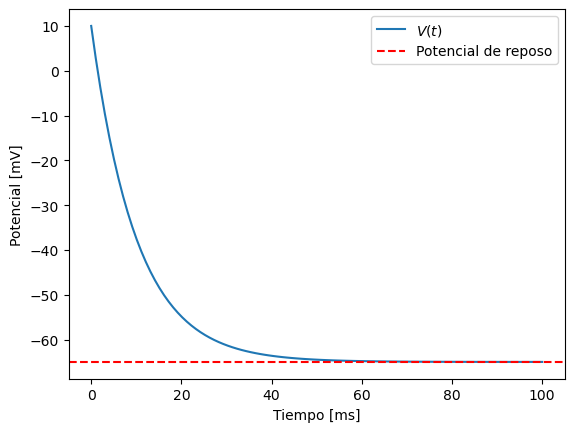

In [6]:
plt.plot(t, V_t, label='$V(t)$')
plt.axhline(E, linestyle='--', color='red', label='Potencial de reposo')
plt.legend()
plt.xlabel('Tiempo [ms]')
plt.ylabel('Potencial [mV]')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

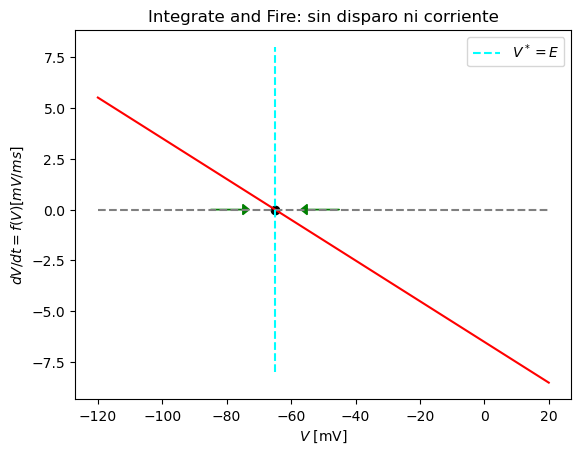

In [12]:
# 2.3)

Vfix = E

def f(V):
    return (E-V)/tau

plt.xlabel('$V$ [mV]')
plt.ylabel('$dV/dt=f(V)  [mV/ms]$')

valores_V = np.linspace(-120, 20, 100)
valores_f = np.vectorize(f)(valores_V)

plt.plot(valores_V, valores_f, label="", linestyle='-', color='red')
plt.plot(valores_V, np.zeros(len(valores_V)), label="", linestyle='--', color='gray')
plt.plot([Vfix, Vfix], [-8, 8], label="$V^*=E$", linestyle='--', c='cyan')
plt.arrow(Vfix-20.0, 0.0, 10.0, 0.0, head_width=0.5, head_length=2, fc='g', ec='g')
plt.arrow(Vfix+20.0, 0.0, -10.0, 0.0, head_width=0.5, head_length=2, fc='g', ec='g')
plt.scatter([Vfix], [0], c='black')
plt.title('Integrate and Fire: sin disparo ni corriente')
plt.legend()
plt.show

In [22]:
# 2.5)

La ecuación diferencial es:

\begin{equation}
\frac{dV}{dt} = \frac{1}{\tau} \left( E - V(t) + R I(t) \right)
\end{equation}

Reorganizamos como:

\begin{equation}
\frac{dV}{dt} + \frac{V(t)}{\tau} = \frac{E}{\tau} + \frac{R I(t)}{\tau}
\end{equation}

El factor integrante es $\mu(t) = e^{t/\tau}$, y multiplicando la ecuación por este factor:

\begin{equation}
\frac{d}{dt} \left( e^{t/\tau} V(t) \right) = e^{t/\tau} \left( \frac{E}{\tau} + \frac{R I(t)}{\tau} \right)
\end{equation}

Integramos ambos lados:

\begin{equation}
e^{t/\tau} V(t) = \int e^{t/\tau} \left( \frac{E}{\tau} + \frac{R I(t)}{\tau} \right) dt + C
\end{equation}

La solución general es:

\begin{equation}
V(t) = E + e^{-t/\tau} \left[ V_0 - E + \frac{1}{\tau} \int_0^t e^{t'/\tau} R I(t') dt' \right]
\end{equation}

## **Ejercicio 3)** Dinámica con mecanismo de disparo activado

**1)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

**2)** Grafique la solución computada en el inciso **3.1)**. Incorpore al gráfico la solución exacta del inciso **2.1)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **3.1)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$, donde $V^*$ es el valor de $V$ tal que $f(V)=0$.

**3)** Para el caso indicado en el inciso **3.1)**, calcule analíticamente el período de disparo.
Observe si el valor computado corresponde con el observado en el inciso **3.2)**.
Grafíque la frencuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?


**4)** Repita **3.1)** y **3.2)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **2.1)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

**5)** Repita **3.1)** y **3.2)** con

\begin{equation}
I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que en inciso anterior, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.